In [ ]:
import pandas as pd
import numpy as np
import re

from google.colab import files

pd.options.mode.chained_assignment = None  # default='warn'

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Path ke file CSV yang sudah diunggah
data_path = "/content/insurance_data.csv"
df = pd.read_csv(data_path, sep=None)
display(df.head())

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1340 non-null   int64  
 1   PatientID      1340 non-null   int64  
 2   age            1335 non-null   float64
 3   gender         1340 non-null   object 
 4   bmi            1340 non-null   float64
 5   bloodpressure  1340 non-null   int64  
 6   diabetic       1340 non-null   object 
 7   children       1340 non-null   int64  
 8   smoker         1340 non-null   object 
 9   region         1337 non-null   object 
 10  claim          1340 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 115.3+ KB


In [ ]:
print("Statistik Deskriptif")
df.describe(include = 'all')

Statistik Deskriptif


,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
count,1340.000000,1340.000000,1335.000000,1340,1340.000000,1340.000000,1340,1340.000000,1340,1337,1340.000000
unique,NaN,NaN,NaN,2,NaN,NaN,2,NaN,2,4,NaN
top,NaN,NaN,NaN,male,NaN,NaN,No,NaN,No,southeast,NaN
freq,NaN,NaN,NaN,678,NaN,NaN,698,NaN,1066,443,NaN
mean,669.500000,670.500000,38.078652,NaN,30.668955,94.157463,NaN,1.093284,NaN,NaN,13252.745642
std,386.968991,386.968991,11.102924,NaN,6.106735,11.434712,NaN,1.205334,NaN,NaN,12109.609288
min,0.000000,1.000000,18.000000,NaN,16.000000,80.000000,NaN,0.000000,NaN,NaN,1121.870000
25%,334.750000,335.750000,29.000000,NaN,26.275000,86.000000,NaN,0.000000,NaN,NaN,4719.685000
50%,669.500000,670.500000,38.000000,NaN,30.400000,92.000000,NaN,1.000000,NaN,NaN,9369.615000
75%,1004.250000,1005.250000,47.000000,NaN,34.700000,99.000000,NaN,2.000000,NaN,NaN,16604.305000


In [ ]:
print("Tipe jumlah anak:", sorted(df['children'].unique()))
print("\n Jumlah nasabah per kategori jumlah anak:")
print(df['children'].value_counts().sort_index())

Tipe jumlah anak: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5)]

 Jumlah nasabah per kategori jumlah anak:
children
0    576
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64


# **EDA (Exploratory Data Analysis)**

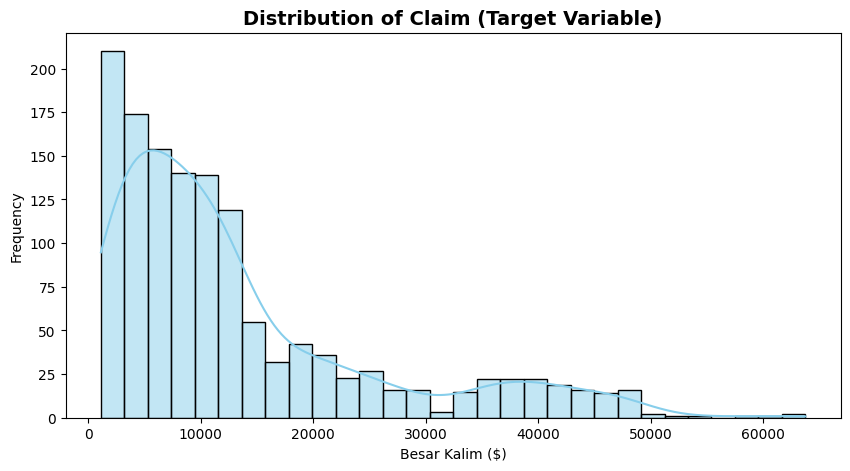

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(df['claim'], kde=True, color='skyblue')
plt.title('Distribution of Claim (Target Variable)', fontsize=14, fontweight='bold')
plt.xlabel('Besar Kalim ($)')
plt.ylabel('Frequency')
plt.show()

Key Insight: Data miring ke kanan (skewed right) berarti lebih banyak orang klaimnya murah

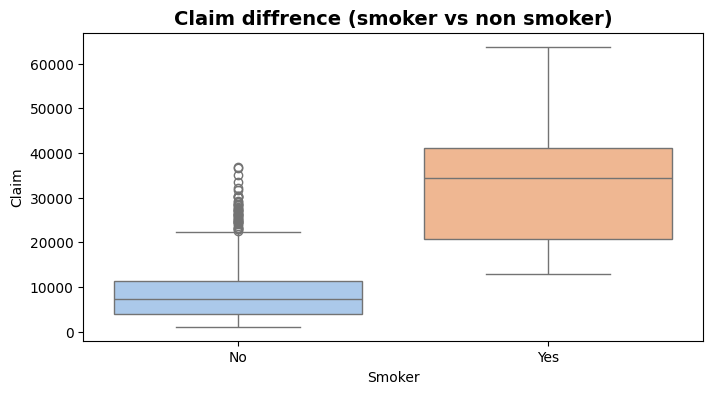

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='smoker', y='claim', data=df, palette='pastel')
plt.title('Claim diffrence (smoker vs non smoker)', fontsize=14, fontweight='bold')
plt.xlabel('Smoker')
plt.ylabel('Claim')
plt.show()

Key insight: Perokok memiliki biaya asuransi klaim lebih tinggi

TypeError: axline() missing 1 required positional argument: 'xy1'

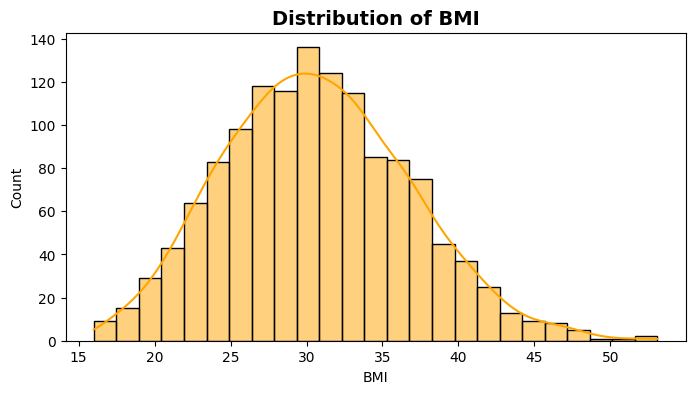

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(df['bmi'], kde=True, color='orange')
plt.title('Distribution of BMI', fontsize=14, fontweight='bold')
plt.xlabel('BMI')
plt.axline(x=30, color='red', linestyle='--', label='Batas obesitas(30)')
plt.show()

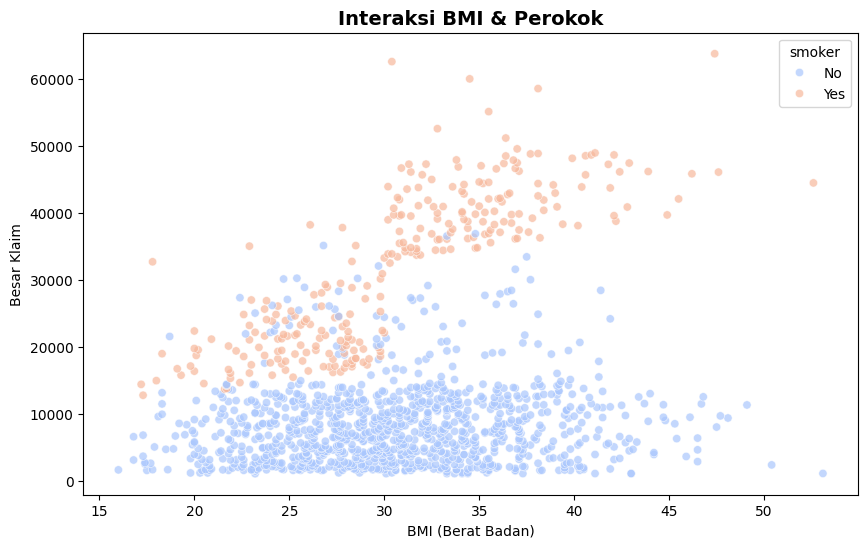

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='claim', hue='smoker', data=df, palette='coolwarm', alpha=0.7)
plt.title('Interaksi BMI & Perokok', fontsize=14, fontweight='bold')
plt.xlabel('BMI (Berat Badan)')
plt.ylabel('Besar Klaim')
plt.show()

In [ ]:
print("Region Analysis (Urutan Claim Termahal)")
avg_claim_region = df.groupby('region')['claim'].mean().sort_values(ascending=False)
print(avg_claim_region)

Region Analysis (Urutan Claim Termahal)
region
northeast    16889.044719
southeast    13058.522664
southwest    12723.129841
northwest    11672.088453
Name: claim, dtype: float64


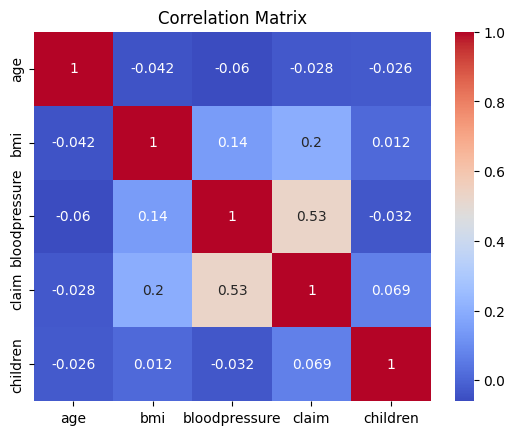

In [ ]:
numeric_cols=['age', 'bmi', 'bloodpressure', 'claim', 'children']
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

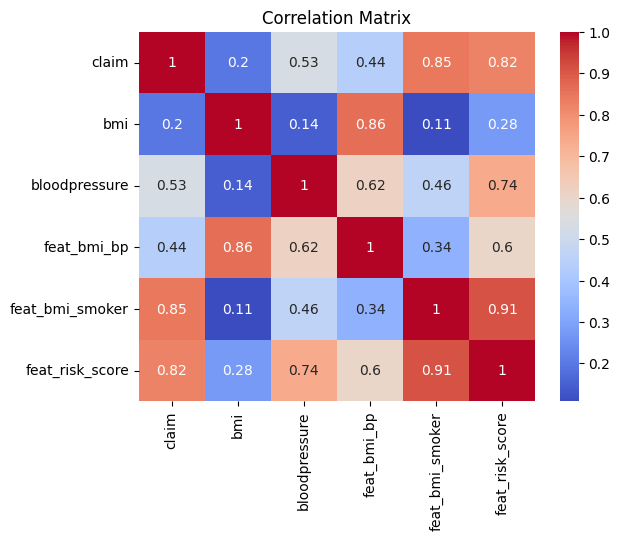

In [ ]:
df['smoker_num'] = df['smoker'].map({'Yes':1, 'No':0})

df['feat_bmi_bp'] = df['bmi'] * df['bloodpressure']
df['feat_bmi_smoker'] = df['bmi'] * df['smoker_num']
df['feat_risk_score'] = df['bloodpressure'] + df['bmi'] + (df['smoker_num']*50)

cols_to_check = ['claim', 'bmi', 'bloodpressure', 'feat_bmi_bp', 'feat_bmi_smoker', 'feat_risk_score']
corr_matrix = df[cols_to_check].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Data Cleaning**

Missing Value

In [ ]:
print(df.isnull().sum())

index              0
PatientID          0
age                5
gender             0
bmi                0
bloodpressure      0
diabetic           0
children           0
smoker             0
region             3
claim              0
smoker_num         0
feat_bmi_bp        0
feat_bmi_smoker    0
feat_risk_score    0
dtype: int64


In [ ]:
df.dropna(inplace=True)
df=df.dropna()

In [ ]:
print(df.isnull().sum())

index              0
PatientID          0
age                0
gender             0
bmi                0
bloodpressure      0
diabetic           0
children           0
smoker             0
region             0
claim              0
smoker_num         0
feat_bmi_bp        0
feat_bmi_smoker    0
feat_risk_score    0
dtype: int64


In [ ]:
df.reset_index(drop=True, inplace=True)

Encoding

In [ ]:
df['smoker_enc'] = df['smoker'].map({'Yes': 1, 'No': 0})
df['gender_enc'] = df['gender'].map({'male': 0, 'female': 1})
df['diabetic_enc'] = df['diabetic'].map({'Yes': 1, 'No': 0})

In [ ]:
display(df.head())

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,smoker_num,feat_bmi_bp,feat_bmi_smoker,feat_risk_score,smoker_enc,gender_enc,diabetic_enc
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87,0,2111.2,0.0,114.2,0,0,1
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51,0,2618.7,0.0,117.1,0,0,0
2,7,8,19.0,male,41.1,100,No,0,No,northwest,1146.80,0,4110.0,0.0,141.1,0,0,0
3,8,9,20.0,male,43.0,86,No,0,No,northwest,1149.40,0,3698.0,0.0,129.0,0,0,0
4,9,10,30.0,male,53.1,97,No,0,No,northwest,1163.46,0,5150.7,0.0,150.1,0,0,0


In [ ]:
# One-Hot Encoding

df_final = pd.get_dummies(df, columns=['region'], drop_first=True)
df = df_final.copy()

print("Data setelah dilakukan one-hot encoding")
display(df.head())

Data setelah dilakukan one-hot encoding


,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,claim,smoker_num,feat_bmi_bp,feat_bmi_smoker,feat_risk_score,smoker_enc,gender_enc,diabetic_enc,region_northwest,region_southeast,region_southwest
0,0,1,39.0,male,23.2,91,Yes,0,No,1121.87,0,2111.2,0.0,114.2,0,0,1,False,True,False
1,1,2,24.0,male,30.1,87,No,0,No,1131.51,0,2618.7,0.0,117.1,0,0,0,False,True,False
2,7,8,19.0,male,41.1,100,No,0,No,1146.80,0,4110.0,0.0,141.1,0,0,0,True,False,False
3,8,9,20.0,male,43.0,86,No,0,No,1149.40,0,3698.0,0.0,129.0,0,0,0,True,False,False
4,9,10,30.0,male,53.1,97,No,0,No,1163.46,0,5150.7,0.0,150.1,0,0,0,True,False,False


In [ ]:
features = [
    'age', 'bmi', 'children', 'bloodpressure',
    'smoker_enc', 'diabetic_enc', 'gender_enc',
    'feat_bmi_smoker',
    'region_northwest', 'region_southeast', 'region_southwest'
]

## **Modelling**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [ ]:
X = df[features]
y = df['claim']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model_gb= GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_depth=4, random_state=42)
model_gb.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, max_depth=4, n_estimators=200,
                          random_state=42)

## **Model Evaluation**

In [ ]:
y_pred = model_gb.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Final accuracy (R2 Score): {r2*100:.2f}%")
print(f"Rata-rata meleset (MAE): ${mae:.2f}")

Final accuracy (R2 Score): 84.33%
Rata-rata meleset (MAE): $3612.06
